In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel("Industry_Portfolios.xlsx",index_col = "Date")

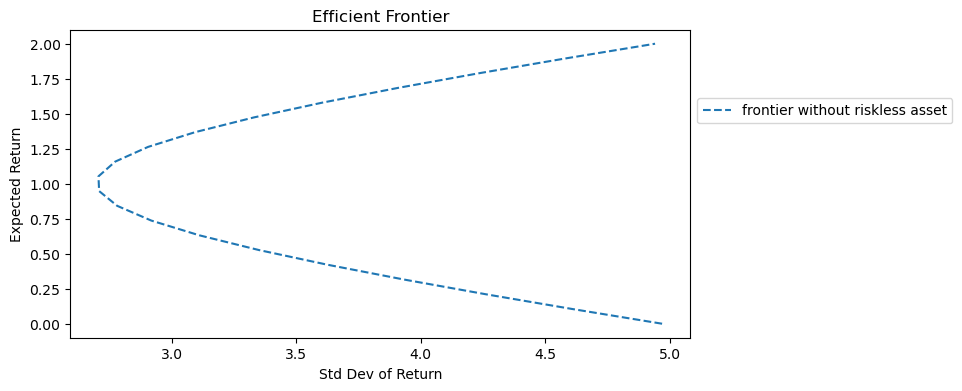

In [3]:
columns = list(df.columns)

# calculate expected return --> n*1 matrix
expected_return = np.array(df.mean())

# calculate covariance matrix --> n*n matrix
cov_matrix = np.cov(df,rowvar = False)
reverse_cov_matrix = np.linalg.inv(cov_matrix)

# set unit matrix --> n*1 matrix
unit_matrix = np.ones(len(expected_return))

alpha = np.dot(expected_return.T,np.dot(reverse_cov_matrix,unit_matrix))
zeta = np.dot(expected_return.T,np.dot(reverse_cov_matrix,expected_return))
delta = np.dot(unit_matrix.T,np.dot(reverse_cov_matrix,unit_matrix))
Rmv = alpha / delta

# # efficient frontier without riskless asset
def frontier_portfolio(Rp):
    risk_square = \
        1/delta \
        + (delta/(zeta*delta-alpha**2))*(Rp-Rmv)**2
    risk = np.sqrt(risk_square)
    return risk

Rp = np.linspace(0,2,20)
risk_p = frontier_portfolio(Rp)

# plot frontier line
plt.figure(figsize = (8,4))
plt.plot(risk_p,Rp,linestyle = "--",label = "frontier without riskless asset")
plt.xlabel("Std Dev of Return")
plt.ylabel("Expected Return")
plt.title("Efficient Frontier")
plt.legend(loc = "upper left",bbox_to_anchor =(1,0.8))
plt.show()

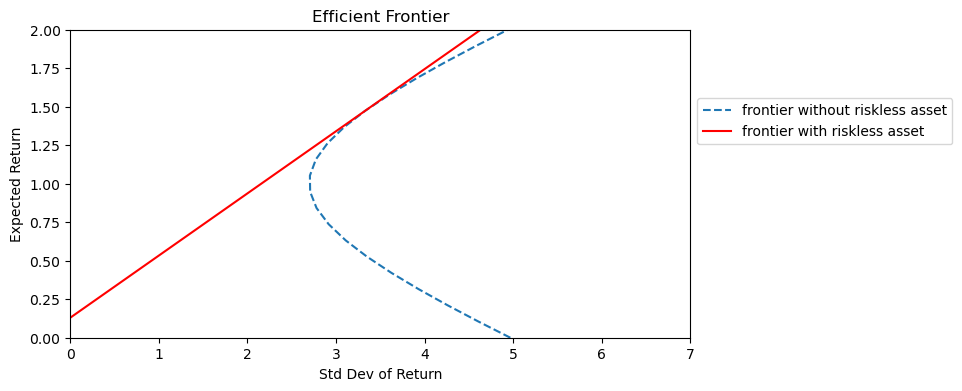

In [4]:
Rf = 0.13
Rp_with_riskless = np.linspace(0.13,2,20)

# efficient frontier with riskless asset
def frontier_with_riskless_asset(Rp):
    risk_square = \
        ((Rp-Rf)**2) / (zeta - 2*alpha*Rf + delta*(Rf**2))
    risk = np.sqrt(risk_square)
    return risk

risk_p_with_riskless = frontier_with_riskless_asset(Rp_with_riskless)

# plot frontier with riskless asset line
plt.figure(figsize = (8,4))
plt.plot(risk_p, Rp, linestyle = "--",label = "frontier without riskless asset")
plt.plot(risk_p_with_riskless, Rp_with_riskless, linestyle = "-",
         color = "red",label = "frontier with riskless asset")
plt.xlabel("Std Dev of Return")
plt.ylabel("Expected Return")
plt.title("Efficient Frontier")
plt.xlim(0,7)
plt.ylim(0,2)
plt.legend(loc = "upper left",bbox_to_anchor =(1,0.8))

plt.show()

### The tangency portfolio

In [5]:
# Calculate tangent portfolio
Rtg = (alpha*Rf - zeta) / (delta*Rf - alpha)
sigma_tg = np.sqrt((zeta - 2*alpha*Rf + delta*(Rf**2)) / (delta**2)*((Rf-Rmv)**2))

# Calculate sharpe ratio of tangent portfolio
sharpe_ratio_1 = (Rtg - Rf) / sigma_tg
sharpe_ratio_2 = np.sqrt(zeta - 2*alpha*Rf + delta*alpha**2) # another way to calculate


# Calculate the weights of tangent portfolio
a = (zeta*np.linalg.inv(cov_matrix)@unit_matrix - alpha*np.linalg.inv(cov_matrix)@expected_return)/(zeta*delta - alpha**2)
b = (delta*np.linalg.inv(cov_matrix)@expected_return - alpha*np.linalg.inv(cov_matrix)@unit_matrix)/(zeta*delta - alpha**2)
weights = a + b*Rtg
weights = pd.Series(weights)
weights

0    0.567972
1   -0.214073
2    0.714105
3    0.104087
4   -0.363438
5   -0.095463
6    0.991647
7    0.075570
8    0.132643
9   -0.913051
dtype: float64